In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import models, layers, optimizers, regularizers
from sklearn.utils import shuffle
import pickle

In [0]:
!unzip "drive/My Drive/deeplearning/flight-delay-prediction.zip"

Archive:  drive/My Drive/deeplearning/flight-delay-prediction.zip
  inflating: Jan_2019_ontime.csv     
  inflating: Jan_2020_ontime.csv     


In [0]:
data_set_2019 = pd.read_csv("Jan_2019_ontime.csv", na_values = [0])

In [0]:
display(len(data_set_2019))
display(data_set_2019.head())

583985

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,NaN,0600-0659,722.0,NaN,NaN,NaN,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,NaN,1400-1459,1633.0,NaN,NaN,NaN,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,NaN,1200-1259,1329.0,NaN,NaN,NaN,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,NaN,1500-1559,1625.0,NaN,NaN,NaN,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,NaN,1900-1959,1940.0,NaN,NaN,NaN,579.0,NaN


In [0]:
data_set_2019 = data_set_2019.replace(np.nan, 0)

In [0]:
display(len(data_set_2019))
display(data_set_2019.head())

583985

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,0.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,0.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,0.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,0.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,0.0


In [0]:
target_2019 = data_set_2019['ARR_TIME']
data_set_2019 = data_set_2019.drop(['ARR_TIME'], axis = 1)

In [0]:
dummeis_2019 = pd.get_dummies(data_set_2019[["OP_UNIQUE_CARRIER", "OP_CARRIER", "ORIGIN", "DEST", "DEP_TIME_BLK"]])

In [0]:
data_set_2019 = pd.concat([data_set_2019,dummeis_2019], axis = 1 )

In [0]:
print(data_set_2019.head())

   DAY_OF_MONTH  DAY_OF_WEEK  ... DEP_TIME_BLK_2200-2259  DEP_TIME_BLK_2300-2359
0             1            2  ...                      0                       0
1             1            2  ...                      0                       0
2             1            2  ...                      0                       0
3             1            2  ...                      0                       0
4             1            2  ...                      0                       0

[5 rows x 766 columns]


In [0]:
data_set_2019 = data_set_2019.drop(["OP_UNIQUE_CARRIER", "OP_CARRIER", "ORIGIN", "DEST", "TAIL_NUM", "Unnamed: 21", "DEP_TIME_BLK"], axis = 1)

In [0]:
display(data_set_2019.head())

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,OP_UNIQUE_CARRIER_F9,OP_UNIQUE_CARRIER_G4,OP_UNIQUE_CARRIER_HA,OP_UNIQUE_CARRIER_MQ,OP_UNIQUE_CARRIER_NK,OP_UNIQUE_CARRIER_OH,OP_UNIQUE_CARRIER_OO,OP_UNIQUE_CARRIER_UA,OP_UNIQUE_CARRIER_WN,OP_UNIQUE_CARRIER_YV,OP_UNIQUE_CARRIER_YX,OP_CARRIER_9E,OP_CARRIER_AA,OP_CARRIER_AS,OP_CARRIER_B6,OP_CARRIER_DL,OP_CARRIER_EV,OP_CARRIER_F9,OP_CARRIER_G4,OP_CARRIER_HA,...,DEST_TLH,DEST_TOL,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TWF,DEST_TXK,DEST_TYR,DEST_TYS,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_YAK,DEST_YUM,DEP_TIME_BLK_0001-0559,DEP_TIME_BLK_0600-0659,DEP_TIME_BLK_0700-0759,DEP_TIME_BLK_0800-0859,DEP_TIME_BLK_0900-0959,DEP_TIME_BLK_1000-1059,DEP_TIME_BLK_1100-1159,DEP_TIME_BLK_1200-1259,DEP_TIME_BLK_1300-1359,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359
0,1,2,20363,3280,11953,1195302,10397,1039707,601.0,0.0,0.0,0.0,0.0,300.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,20363,3281,13487,1348702,11193,1119302,1359.0,0.0,0.0,0.0,0.0,596.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2,20363,3282,11433,1143302,11193,1119302,1215.0,0.0,0.0,0.0,0.0,229.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,2,20363,3283,15249,1524906,10397,1039707,1521.0,0.0,0.0,0.0,0.0,223.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,2,20363,3284,10397,1039707,11778,1177801,1847.0,0.0,0.0,0.0,0.0,579.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
print(len(target_2019))

583985


In [0]:
target_2019 = target_2019.to_numpy()

In [0]:
target_2019.shape

(583985,)

In [0]:
data_set_2019 = data_set_2019.to_numpy()

In [0]:
print(data_set_2019.shape)

(583985, 759)


In [0]:
target_2019 = shuffle(target_2019)

In [0]:
print(target_2019.shape)

(583985,)


In [0]:
data_set_2019 = data_set_2019.astype("float32")
target_2019 = target_2019.astype("float32")

In [0]:
mean = np.mean(data_set_2019, axis = 0)
std = np.std(data_set_2019, axis = 0)

data_set_2019 -= mean
data_set_2019 /= std

In [0]:
mean = np.mean(target_2019, axis = 0)
std = np.std(target_2019, axis = 0)

target_2019 -= mean
target_2019 /= std

In [0]:
data_set_2019 = shuffle(data_set_2019)

In [0]:
train_data = data_set_2019[194661:]
test_data = data_set_2019[:194661]

In [0]:
print(train_data.shape)
print(test_data.shape)

(389324, 759)
(194661, 759)


In [0]:
train_target = target_2019[194661:]
test_target = target_2019[:194661]

In [0]:
print(train_target.shape)
print(test_target.shape)

(389324,)
(194661,)


In [0]:
model = models.Sequential()
model.add(layers.Dense(128, input_shape = (759,), activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1))

model.compile(
    loss = "mse",
    optimizer = optimizers.RMSprop(),
    metrics = ["mae"]
)

In [0]:
val_data = train_data[:129774]            # total : 389324
partial_train_data = train_data[129774:]

val_target = train_target[:129774]
partial_train_target = train_target[129774:]

In [0]:
history = model.fit(
    partial_train_data, partial_train_target, epochs = 100, batch_size = 512, validation_data = (val_data, val_target), validation_batch_size = 128
)

In [0]:
storagepath = "drive/My Drive/deeplearning/"
def save_data(model, history, iteration):
  model_file = storagepath + "flight_dely_model" + str(iteration).strip() + ".h5"
  historyfile = storagepath + "flight_dely_history" + str(iteration).strip() + ".pkle"
  model.save(model_file)
  with open(historyfile, "wb") as fp:
    pickle.dump(history, fp)
  return model, history
def load_data(iteration):
  model_file = storagepath + "flight_dely_model" + str(iteration).strip() + ".h5"
  historyfile = storagepath + "flight_dely_history" + str(iteration).strip() + ".pkle"
  model = models.load_model(model_file)
  with open(historyfile, "rb") as fp:
    history = pickle.load(fp)
  return model,  history

In [0]:
# save_data(model, history, 1)

In [0]:
model, history = load_data(1)

In [0]:
history = history.history
history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

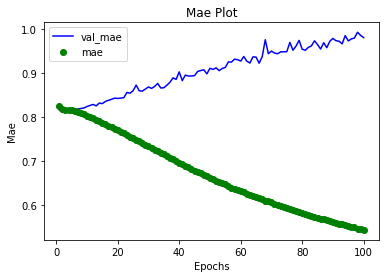

In [0]:
epochs = range(1, len(history["val_mae"])+ 1)
plt.plot(epochs, history["val_mae"], "b", label = "val_mae")
plt.plot(epochs, history["mae"], "go", label = "mae")
plt.xlabel("Epochs")
plt.ylabel("Mae")
plt.title("Mae Plot")
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, input_shape = (759,), activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1))

model.compile(
    loss = "mse",
    optimizer = optimizers.RMSprop(),
    metrics = ["mae"]
)
history = model.fit(
    partial_train_data, partial_train_target, epochs = 100, batch_size = 512, validation_data = (val_data, val_target)
)

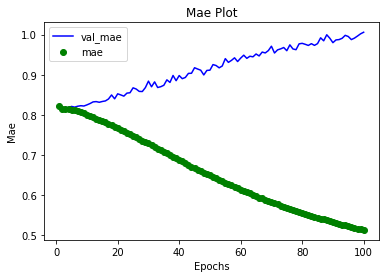

In [0]:
history = history.history
epochs = range(1, len(history["val_mae"])+ 1)
plt.plot(epochs, history["val_mae"], "b", label = "val_mae")
plt.plot(epochs, history["mae"], "go", label = "mae")
plt.xlabel("Epochs")
plt.ylabel("Mae")
plt.title("Mae Plot")
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, input_shape = (759,), activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(1))

model.compile(
    loss = "mse",
    optimizer = optimizers.RMSprop(),
    metrics = ["mae"]
)
history = model.fit(
    partial_train_data, partial_train_target, epochs = 100, batch_size = 512, validation_data = (val_data, val_target), validation_batch_size = 128
)

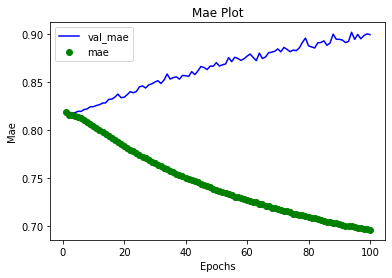

In [0]:
history = history.history
epochs = range(1, len(history["val_mae"])+ 1)
plt.plot(epochs, history["val_mae"], "b", label = "val_mae")
plt.plot(epochs, history["mae"], "go", label = "mae")
plt.xlabel("Epochs")
plt.ylabel("Mae")
plt.title("Mae Plot")
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape = (759,), activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(1))

model.compile(
    loss = "mse",
    optimizer = optimizers.RMSprop(),
    metrics = ["mae"]
)
history = model.fit(
    partial_train_data, partial_train_target, epochs = 100, batch_size = 512, validation_data = (val_data, val_target), validation_batch_size = 128
)

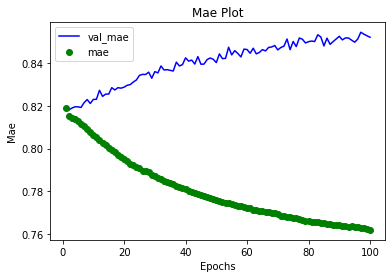

In [0]:
history = history.history
epochs = range(1, len(history["val_mae"])+ 1)
plt.plot(epochs, history["val_mae"], "b", label = "val mae")
plt.plot(epochs, history["mae"], "go", label = "mae")
plt.xlabel("Epochs")
plt.ylabel("Mae")
plt.title("Mae Plot")
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape = (759,), activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(1))

model.compile(
    loss = "mse",
    optimizer = optimizers.RMSprop(),
    metrics = ["mae"]
)
history = model.fit(
    partial_train_data, partial_train_target, epochs = 100, batch_size = 512, validation_data = (val_data, val_target), validation_batch_size = 128
)

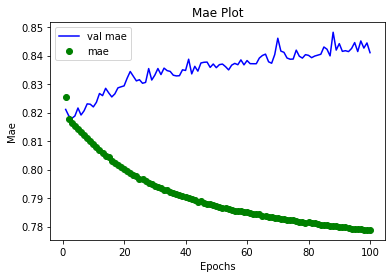

In [0]:
history = history.history
epochs = range(1, len(history["val_mae"])+ 1)
plt.plot(epochs, history["val_mae"], "b", label = "val mae")
plt.plot(epochs, history["mae"], "go", label = "mae")
plt.xlabel("Epochs")
plt.ylabel("Mae")
plt.title("Mae Plot")
plt.legend()
plt.show()

In [0]:
print(0.8410  - 0.7789)

0.06209999999999993


In [0]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape = (759,), activation = "relu"))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(1))

model.compile(
    loss = "mse",
    optimizer = optimizers.RMSprop(),
    metrics = ["mae"]
)
history = model.fit(
    partial_train_data, partial_train_target, epochs = 30, batch_size = 512, validation_data = (val_data, val_target), validation_batch_size = 128
)

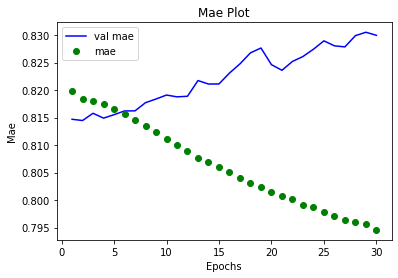

In [0]:
history = history.history
epochs = range(1, len(history["val_mae"])+ 1)
plt.plot(epochs, history["val_mae"], "b", label = "val mae")
plt.plot(epochs, history["mae"], "go", label = "mae")
plt.xlabel("Epochs")
plt.ylabel("Mae")
plt.title("Mae Plot")
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape = (759,), activation = "relu", kernel_regularizer = regularizers.l2(0.001)))
model.add(layers.Dense(32, activation = "relu", kernel_regularizer = regularizers.l2(0.001)))
model.add(layers.Dense(64, activation = "relu", kernel_regularizer = regularizers.l2(0.001)))
model.add(layers.Dense(64, activation = "relu", kernel_regularizer = regularizers.l2(0.001)))
model.add(layers.Dense(1))

model.compile(
    loss = "mse",
    optimizer = optimizers.RMSprop(),
    metrics = ["mae"]
)
history = model.fit(
    partial_train_data, partial_train_target, epochs = 30, batch_size = 512, validation_data = (val_data, val_target), validation_batch_size = 128
)

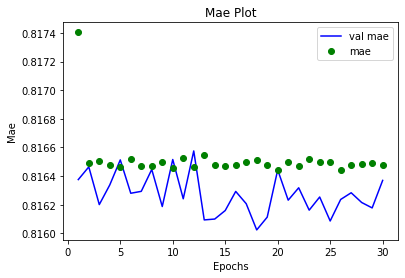

In [0]:
history = history.history
epochs = range(1, len(history["val_mae"])+ 1)
plt.plot(epochs, history["val_mae"], "b", label = "val mae")
plt.plot(epochs, history["mae"], "go", label = "mae")
plt.xlabel("Epochs")
plt.ylabel("Mae")
plt.title("Mae Plot")
plt.legend()
plt.show()

In [0]:
model.evaluate(test_data, test_target)

6084/6084 [==============================] - 11s 2ms/step - loss: 0.9998 - mae: 0.8174


[0.9998437166213989, 0.8173831701278687]

In [0]:
prediction = model.predict(test_data)
prediction[0]

array([-0.00070958], dtype=float32)

In [0]:
save_data(model, history, 2)